## Import the necessary libraries

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial import distance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

## DBSCAN Algorithm

In [2]:
def DBSCAN(D, eps, MinPts):
    C = 0 
    clusters_id = np.zeros(D.shape[0])
    
    for i in range(D.shape[0]):
        
        if clusters_id[i]==0:
            NeighborPts = regionQuery(i, eps,D)
            #print(NeighborPts)
            
            if len(NeighborPts)< MinPts:
                clusters_id[i]= -1
            else:
                C += 1 
                expandCluster(i, NeighborPts, C, eps, MinPts,clusters_id)
    return clusters_id
                
                
                       
            

In [3]:
def expandCluster(P, NeighborPts, C, eps, MinPts,clusters_id):
    clusters_id[P] = C
    for pts in NeighborPts:
        
        if clusters_id[pts]==0:
            clusters_id[pts] = C
            nbrpts = regionQuery(pts, eps, X)
            if len(nbrpts)>=MinPts:
                NeighborPts += nbrpts
                
        elif clusters_id[pts]==-1:
            clusters_id[pts] = C
        
    

In [4]:
def regionQuery(P, eps, matrix):
    neighbor_points = []
    
    for i in range(matrix.shape[0]):
        if  distance.euclidean(matrix[i],matrix[P]) <=eps:
            #print('Yes')
            neighbor_points.append(i)
    return neighbor_points

            

## Calculate the Jaccard and Rand Index

In [5]:
def jaccard_rand(predicted, ground):
    length = len(predicted) 
    predicted_matrix = np.zeros((length, length))
    ground_matrix = np.zeros((length, length))
    
    ## Ground truth and Predicted matrix
    for i in range(length):
        for j in range(length):
            if predicted[i]==predicted[j]:
                predicted_matrix[i][j]=1
            if ground[i]==ground[j]:
                ground_matrix[i][j] = 1
                
    ## Calculating the agree and disagree value for jaccard and rand
            
    m00,m01,m10,m11 = 0,0,0,0
    for i in range(length):
        for j in range(length):
            if predicted_matrix[i][j]+ground_matrix[i][j]==2:
                m11 +=1
            elif predicted_matrix[i][j]+ground_matrix[i][j]==0:
                m00 +=1
            elif predicted_matrix[i][j]==0 and ground_matrix[i][j]==1:
                m01 +=1
            elif predicted_matrix[i][j]==1 and ground_matrix[i][j]==0:
                m10 +=1
                
    ## Calculating jaccard and rand index
    jaccard = float(m11)/(m11 + m10 + m01)
    rand = float(m11 + m00) / (m11 + m10 + m01 + m00)

    return jaccard, rand

    

## Plot the Principal components

In [6]:
def plot_pca(predicted_clusters,X):
    pca = PCA(n_components=2)
    pca.fit(X)
    x_pca = pca.transform(X)
    pca_x = pd.DataFrame(x_pca,columns=['pc_1','pc_2'])
    pca_x['clusters'] = predicted_clusters
    sns.set_style('darkgrid')
    sns.lmplot(x = 'pc_1',y='pc_2',data = pca_x,hue='clusters',fit_reg=False,size=7,aspect=1)
    plt.title('DBSCAN Clustering')
    plt.show()
    

## Input Code



1.0 : [1, 3, 4, 5, 6, 12, 14, 15, 16, 19, 21, 26, 27, 29, 40, 43, 44, 46, 48, 50, 52, 57, 61, 63, 65, 71, 79, 83, 84, 86, 90, 92, 95, 101, 105, 108, 112, 113, 116, 118, 119, 122, 127, 129, 130, 134, 139, 142, 145, 147]
2.0 : [2, 7, 8, 9, 10, 11, 13, 17, 18, 20, 22, 23, 24, 25, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 45, 47, 49, 51, 53, 54, 55, 56, 58, 59, 60, 62, 64, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 85, 87, 88, 89, 91, 93, 94, 96, 97, 98, 99, 100, 102, 103, 104, 106, 107, 109, 110, 111, 114, 115, 117, 120, 121, 123, 124, 125, 126, 128, 131, 132, 133, 135, 136, 137, 138, 140, 141, 143, 144, 146, 148, 149, 150]


Jaccard value :0.6
Rand Index value :0.7777777777777778


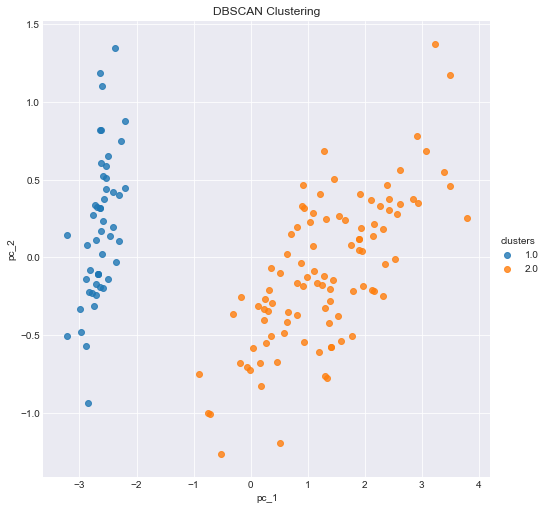

In [7]:
## Read the data define the values
data = pd.read_csv('new_dataset_1.txt', sep='\t', header=None)
gene = list(data[0].values)
ground_truth = np.array(list(data[1].values))
X = data.drop([0,1],axis=1).values

## input values
epsilon = 1.1
min_points = 3

## Find the clusters using DBSCAN
clusters = DBSCAN(X, epsilon, min_points)

cluster_dict = defaultdict(list)
for idx,value in enumerate(clusters):
    cluster_dict[value].append(idx+1)
print('\n')   
for key,value in cluster_dict.items():
    print(str(key) +' : '+ str(value))
    
## Calculating Jaccard and Rand Index    
jaccard , rand = jaccard_rand(clusters,ground_truth)
print('\n')
print('Jaccard value :'+ str(jaccard))
print('Rand Index value :'+ str(rand))

## Plotting the Principal components
plot_pca(clusters,X)

    
    
